# FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [35]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
#let me add the below line as well, so that we can see the plots in notebook's interface itself
%matplotlib inline 
import seaborn as sns

### Understanding the structure of the data

In [36]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

#Note: As I won't be using Google Colab, so I won't need this

In [37]:
# read the data
df = pd.read_csv('foodhub_order.csv')
#Let me make a copy so that I can work on the dataset without making changes in the original dataset
foodhub = df.copy()

In [38]:
'''As this dataset has slightly more observations, I want to have a quick look at more observations than just first five rows 
as returned by the default'''
foodhub.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


In [39]:
#Quick glimpse of the last 10 rows 
foodhub.tail(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5,21,26
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:
1. The DataFrame has 9 columns as mentioned in the Data Dictionary. 
2. Data in each row corresponds to the order placed by a customer.
3. There are altogether 1898 observations as the first observation starts from indexed value of 0
4. We can get a general sense of what the dataset is about. The dataset has the information on the customer, his/her order--what type of food, from which restaurant, what rating did he/she give, and so on. Orders have been grouped into two categories--weekend and weekday, and the dataset has also the information on as to how much time does it take to get food prepared, and get delivered to the customers' doors. 


### How many rows and columns are present in the data?

In [40]:
type(foodhub)

pandas.core.frame.DataFrame

In [41]:
#Let me see the dimension of the dataframe 
foodhub.shape

(1898, 9)

#### Observations: 
1. The dataframe has 1,898 rows, and 9 columns
2. Running type also helps me double check the type of data frame I have as there are certain attributes that could be run in pandas DataFrame only, and not for others (for instance, 'info', 'dtypes' are not the attributes of nd.array in Numpy )

###  What are the datatypes of the different columns in the dataset?

In [42]:
foodhub.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [43]:
#alternatively, I can use the following dot method to get more information
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
1. All columns have 1898 entries or observations 
2. There are 9 columns or variables. Four are integers, four are objects, and one is float. 
3. The similar frequency of all the columns indicate that there may not be missing values but eyeballing the dataset, we can see rating has quite a few observations which are labelled as 'Not given'. This could be an issue especially while answering Q.13 when we have to deal with the mean(average) of the rating. As 'rating' is a panda series consisting of both string and numeric values, computing mean won't be possible. Hence, the best option to address this issue would be the replacement of 'Not given' by 0. Doing this will help in two ways: a. The rating as expected would be a numeric variable(an integer or float) b. We can do the calculation without biases with zero being assigned to 'Not given'
4. int64 means that it has a range of 2^64, and takes 64 bits to be represented, and thus takes 8 bytes of space 



In [44]:
print(type(foodhub.rating))
print(foodhub.rating.head(10))

<class 'pandas.core.series.Series'>
0    Not given
1    Not given
2            5
3            3
4            4
5            3
6    Not given
7            3
8            5
9            5
Name: rating, dtype: object


In [69]:
#Replacing 'Not given' by zero(0) as there are only options of 1-5 for rating, and 0 effectively corresponds to value when rate is not given
#And converting object 'rating' to numeric one. 
dict1 = {"Not given" : 0}
foodhub['rating'].replace(dict1, inplace = True)
print(foodhub.rating)
foodhub['rating'] = pd.to_numeric(foodhub['rating'])
foodhub.info()

0       0
1       0
2       5
3       3
4       4
       ..
1893    5
1894    5
1895    0
1896    5
1897    0
Name: rating, Length: 1898, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 133.6+ KB


### Are there any missing values in the data?

In [46]:
# Checking for missing values 
foodhub.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: 
1. There are no missing values in the dataset
2. As I explained above in details,'rating' has a unique category of 'not given', and this has been replaced by 0. 

### Check the statistical summary of the data. 

In [47]:
#summary statistics of the dataset for numeric variables only
#I use 'transpose' to switch the row and column indices as I find this way much easier to eyeball the summary stats 
foodhub.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,2.659642e+00,2.195280,0.00,0.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [48]:
#Summary of the non-numeric variables 
foodhub.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351


#### Observations: 
1. Minimum time to prepare food once the order is placed is 20 minutes. Similary the average time for food being prepared is 27.37 minutes(~27 mins), and the maximum time a restaurant may take to get the food ready is 35 minutes
2. A customer in this dataset seems to have spend 4.47 bucks at the minimum, and $35.41 at the maximum. On average, customers spend $16.49.
3. 50% of Customers seem to have given rating below 4. Maximum rating is 5. O here indicates the rating 'Not given'.
4. It takes 24.16 minutes on average to deliver food. The time ranges from 15 mins at the minimum, and 33 mins at the maximum.
5. I can get some sense of non-numeric variables as well. Shake Shack happens to be the restaurants getting the most orders from customers. American cuisine happens to be the most popular among the customers. As expected, orders are placed more in the weekend than on weekdays. 

### How many orders are not rated?

In [49]:
foodhub.rating.value_counts()
#alternatively, we can run the following line of code 
#foodhub.value_counts("rating")

0    736
5    588
4    386
3    188
Name: rating, dtype: int64

In [50]:
#another alternative
cat_col = ['rating']

# Let me print the number of count of each unique value in the selected column
for column in cat_col:
    print(foodhub[column].value_counts())
    
    print('-' * 5)

0    736
5    588
4    386
3    188
Name: rating, dtype: int64
-----


#### Observations: 
736 orders are not rated 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

###  Explore all the variables and provide observations on their distributions.

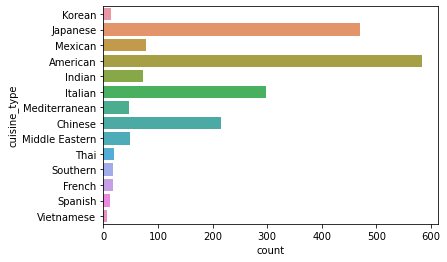

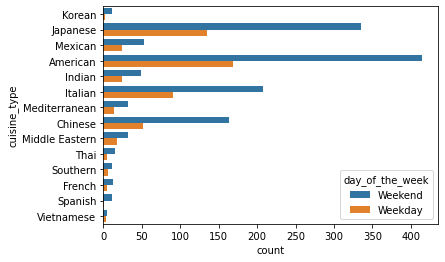

In [51]:
#Count plot for cuisine_type 

sns.countplot(data = foodhub, y = 'cuisine_type')

##display the plot
plt.show()

# Looking at if food type varies by the day of the week
sns.countplot(data = foodhub, y = 'cuisine_type', hue = 'day_of_the_week')

# display the plot
plt.show()


###Observation 1: cuisine_type 
1. As cuisine_type is a categorical variable, count plot would be the appropriate visualization tool.
2. Looking at the countplot, American cuisine happens to be the most ordered cuisine followed by Japanese, Italian, and Chinese. 
3. The most ordered cuisines on average in a week happen to be in the same order in terms of order--be it the weekday or weekend.




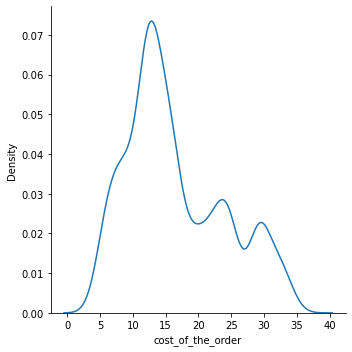

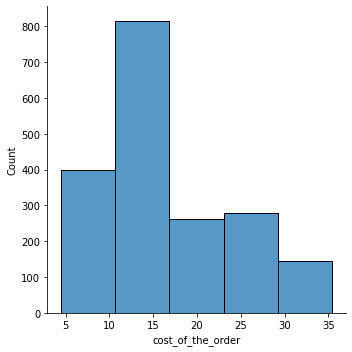

In [52]:
# distribution plot for cost of the order
# dist plot would be appropriate for the continuous variable like this 
sns.displot(foodhub['cost_of_the_order'], kind='kde')

# display the plot
plt.show()

sns.displot(data= foodhub, x = 'cost_of_the_order', bins = 5,)
plt.show()

Observation 2 : cost of the order
1. From the above plot, we can see that the cost of the order is skewed to the right. The value of mean (16.49) for this variable is greater than median (14.14) which corroborates the skewness towards right.  

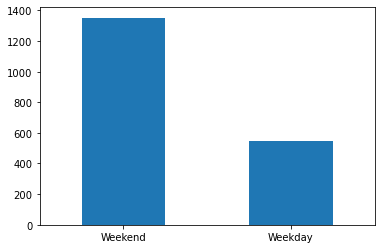

In [53]:
#bar plot for the dichotomous variable 'day_of_the_week'
foodhub.day_of_the_week.value_counts().plot(kind='bar', rot = 0)

# display the plot
plt.show()

Observation 3: day of the week
1. Food orders during the weekend are higher than that in the weekdays.

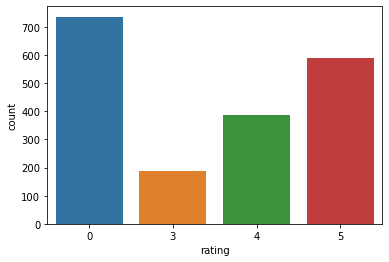

In [54]:
#countplot for categorical variable 'rating'
sns.countplot(data = foodhub, x = 'rating')

##display the plot
plt.show()

Observation 4: rating
1. Most of the customers are not interested in rating their order placement in foodhub 
2. Among the customers who rated, a higher number of them seem to be satisfied with the service they got via foodhub.

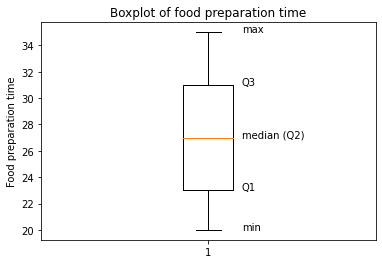

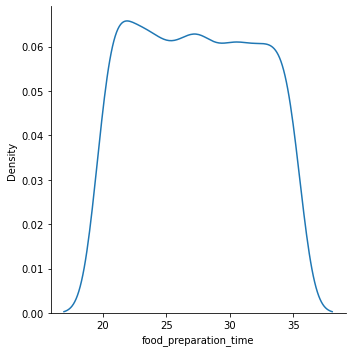

In [55]:
# Plot Food preparation time 
# I can think of both box plot and hist plot for this variable
# Let me draw a box plot as I have already plotted histplot for other variables

plt.boxplot(foodhub['food_preparation_time'])

# labels for five number summary
plt.text(x = 1.1, y = foodhub['food_preparation_time'].min(), s ='min')
plt.text(x = 1.1, y = foodhub.food_preparation_time.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = foodhub['food_preparation_time'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = foodhub.food_preparation_time.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = foodhub['food_preparation_time'].max(), s ='max')


# label the title and axes
plt.title('Boxplot of food preparation time')
plt.ylabel('Food preparation time')

# display the plot
plt.show()

#This plot looks more or less symmetrical (or like a normal distribution)
#Hence, let me test this with the histplot as well
#though mean and median happen to be similar, the plot is not normally distributed as shown below
sns.displot(foodhub['food_preparation_time'], kind='kde')

# display the plot
plt.show()

Observation 5: food preparation time 
1. Looking at the boxplot, there are no outliers
2. Looking at the boxplot, the mean and median are very close. And hence,the distribution is neither positively skewed, nor negatively skewed i.e. median is almost equally distanced from Q1 and Q3.
3. I checked if the distribution is symmetric, and that it is normal distribution( a bell curve), it however emerged that it is not. 

    

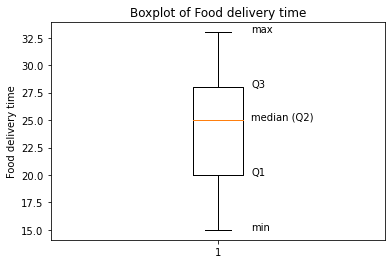

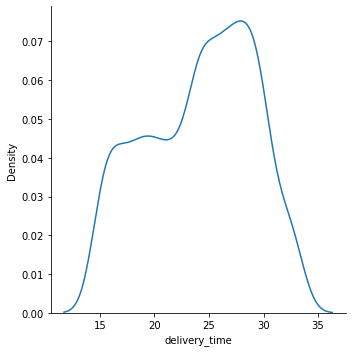

In [56]:
#Box plot for delivery time as well
plt.boxplot(foodhub['delivery_time'])

# labels for five number summary
plt.text(x = 1.1, y = foodhub['delivery_time'].min(), s ='min')
plt.text(x = 1.1, y = foodhub.delivery_time.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = foodhub['delivery_time'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = foodhub.delivery_time.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = foodhub['delivery_time'].max(), s ='max')


# label the title and axes
plt.title('Boxplot of Food delivery time')
plt.ylabel('Food delivery time')

# display the plot
plt.show()

#Let me plot a distribution plot as well 
sns.displot(foodhub['delivery_time'], kind='kde')

# display the plot
plt.show()

Observation 6 : Delivery time
1. There are no outliers in the dataset for delivery time as evident from the box plot
2. Median is closer to Q3 indicating that the distribution is skewed to the left. The distribution plot also corroborates it.


### Which are the top 5 restaurants in terms of the number of orders received?

In [57]:
foodhub.restaurant_name.value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: 
The top five restaurants are as follows: 
1. Shake Shack, 2. The Meatball Shop, 3. Blue Ribbon Sushi, 4. Blue Ribbon Fried Chicken, 5. Parm. 
The frequency with which the restaurant appears in the dataset showcases the number of orders received by it.


### Which is the most popular cuisine on weekends?

In [58]:
foodhub.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

In [59]:
foodhub.groupby('day_of_the_week')['cuisine_type'].get_group('Weekend'). value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
1. American cuisine happens to be the most popular in weekend.To go beyond what has been asked here, American cuisine is also the most popular cuisine in the weekdays as well.



### What percentage of the orders cost more than 20 dollars?

In [60]:
costly_order = foodhub[foodhub['cost_of_the_order']>20]
costly_order
percent = round((len(costly_order)/len(foodhub))*100, 2)
percent
# I remember using lambda function to calculate the percentage in one of our video lessons
#But with Pandas DataFrame, it seems to be a little bit complicated. I hope to learn more on this

29.24

#### Observations:
29.24% of the orders cost more than 20 bucks.That means, over a quarter of the customers in the dataset are spending more than $20 dollars to order food via foodhub.

###  What is the mean order delivery time?

In [61]:
round(foodhub['delivery_time'].mean(),2)

24.16

#### Observations:
A delivery personnel takes 24.16 minutes on average to deliver food to the customer's door.

### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [62]:
foodhub['customer_id'].value_counts().head(10)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64

#### Observations:
The number of orders placed by the customer would be the frequency with which they appear in the dataset. We see that the customer with id 52832 has placed the highest number of orders i.e. 13. In the descending order, the other two higher number of orders placed happen to be 10 and 9 associated with customers with ids 47440 and 83287. Though frequencies 7 and 6 happen to be outside the purview of this question, it is worth mentioning that some of the customers happen to have similar number of orders placed.  

### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) 


<Figure size 576x576 with 0 Axes>

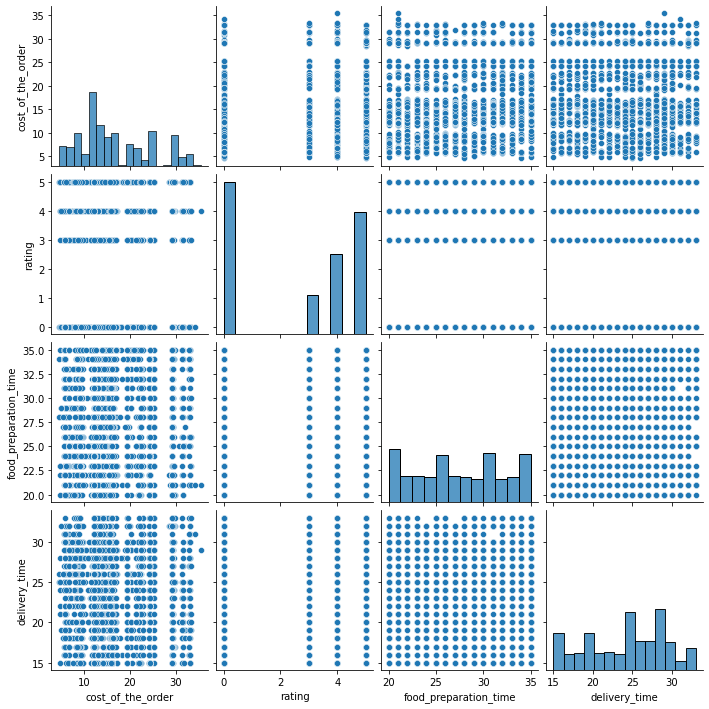

<AxesSubplot:>

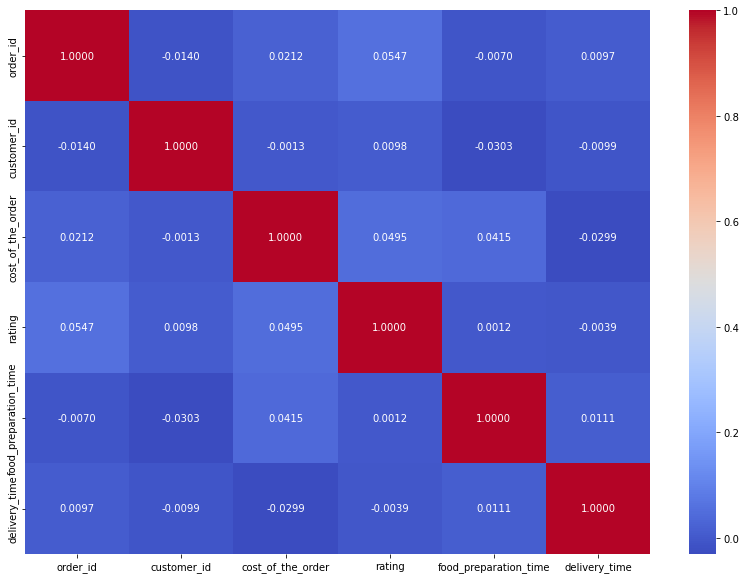

In [170]:
# Let us first check the relationship between all the variables 
# Let me begin with pair plot which examines the relation between any two pair of variables
#Let me pick only the numeric variables 
variables_to_drop = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type']
foodhub_selected = foodhub.drop(variables_to_drop, axis=1)

plt.figure(figsize = (8,8))

# plot a pair plot
sns.pairplot(foodhub_selected)

# display the plot
plt.show()

#Let me see the heatmap as well
corr = foodhub.corr()
corr
# # Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',            
        fmt = ".4f",            
        xticklabels = corr.columns,            
        yticklabels = corr.columns)


Observation 1: Multivariate : all variables together
1. From the heatmap, it's clear that no variables are correlated with each other. The values, and the indicator color show the absence of such correlation.
2. Absence of correlation is also evident from the pairplot. 
3. The value 1 in the diagonal of heatmap is the correlation of a variable with itself, and hence a perfect 1. 
4. No correlation between the variables is also a good sign as we progress further towards the inferential statistics to use independent variables to predict the dependent variable, we would be facing the issue of mutlicollinearity.

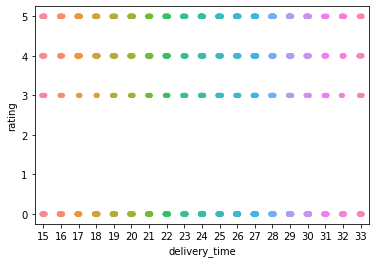

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>]], dtype=object)

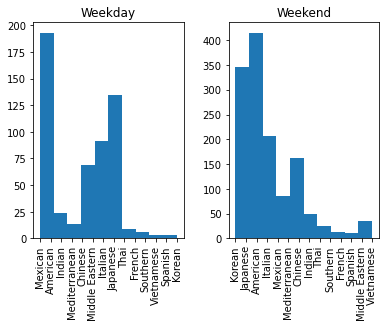

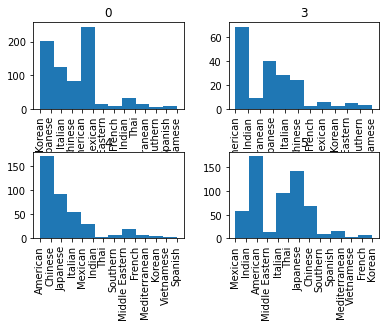

In [64]:
# Let me see potential relationship delivery time and rating
# I assume that there could perhaps be some relationship between delivery time and rating
# I assume faster the delivery, more likely the chance of higher rating
sns.stripplot(y = 'rating', x = 'delivery_time', data = foodhub, jitter = True)

# display the plot
plt.show()

#Histogram by day of the week for cuisine type 
foodhub.hist(by='day_of_the_week',column = 'cuisine_type')

#Histogram by rating for cuisine type 
foodhub.hist(by='rating',column = 'cuisine_type')

Observation: 
1. I was expecting some relationship between delivery time and rating. I was assuming faster the delivery time, more likely would be the chance of a higher rating from the customer. But the strip plot above shows does not support the assumption.
2.  From the second graph, we can see that American cuisine is equally popular in both weekend and weekday. Mexican food however seems to be popular in weekday compared to weekdays.
3. American food looks leading in every category of rating--be it 'Not given', 3, 4 or 5. We see  Thai food however being associated with higher level of rating. As we know, rating gives us the information as to how the customer is satisifed with the service they get from foodhub. This could include a host of areas--user experience of using foodhub app, taste of food, timely delivery, and so on.

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [190]:

#Get only the restaurants that are rated; 0 or not given denotes the restaurant that is not rated
only_rated = foodhub[foodhub['rating'] != 0].copy()

# Dataframe with restaurant names and their count of ratings
rating_count = only_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
rating_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [193]:
#restaurant names that have rating count of more than 50 
over_fifty = rating_count[rating_count['rating']>50]['restaurant_name'] 
print(over_fifty)
# Get the detailed data of restaurants that have rating count more than 50
mean_four = only_rated[only_rated['restaurant_name'].isin(rest_names)].copy()
print(mean_four)
# Grouping restaurants with their rating, and getting the average of the rating 
mean_four.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object
      order_id  customer_id            restaurant_name cuisine_type  \
3      1477334       106968  Blue Ribbon Fried Chicken     American   
12     1476966       129969  Blue Ribbon Fried Chicken     American   
15     1477414        66222                Shake Shack     American   
19     1477354        67487          Blue Ribbon Sushi     Japanese   
22     1478287       150599                Shake Shack     American   
...        ...          ...                        ...          ...   
1880   1477466       222734                Shake Shack     American   
1884   1477437       304993                Shake Shack     American   
1885   1477550        97324                Shake Shack     American   
1886   1478277        48282          The Meatball Shop     American   
1888   1477353       106324          The Meatball Shop    

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
There are four restaurants which have over 50 rating counts, and have the average rating over 4. The restaurants are : The Meatball shop, Blue Ribbon Fried Chicken,Shake Shack, and Blue Ribbon sushi. 

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [194]:
#steps: cost greater than 20 dollars(not inclusive); greater than 5 dollars( 20 should be inclusive here)
# then I can sum 
# foodhub (['cost_of_the_order'] >20).value_counts()
#= foodhub[foodhub['cost_of_the_order']>20]
#foodhub.cost_of_the_order.sum()

rev1 = foodhub[foodhub['cost_of_the_order']>20]['cost_of_the_order'].sum()
print(rev1)
rev2 = foodhub[(foodhub['cost_of_the_order'] > 5) &(foodhub['cost_of_the_order']<= 20)]['cost_of_the_order'].sum()
print(rev2)
net_revenue = (0.25*rev1) + (0.15*rev2)
net_revenue
round((net_revenue),2)

14754.91
16517.170000000002


6166.3

#### Observations:
1. The net revenue generated by the foodhub across all orders is 6166.30 dollar (~$6170).

### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [195]:
# # I created a new column titled totaltime which adds up both food preparation time and the delivery time
foodhub["totaltime"] = foodhub["food_preparation_time"] + foodhub["delivery_time"]
print(foodhub)
over_an_hour = foodhub[foodhub['totaltime']>60]
print(over_an_hour)
percent_over_an_hour = (len(over_an_hour)/len(foodhub))*100
round(percent_over_an_hour, 2)

      order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week  rating  \
0            Korean              30.75         Weekend       0   
1          Japanese        

10.54

#### Observations:
10.54% of the total orders take more than 60 minutes( one hour) to be prepared, and delivered to the customer's door. 

### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [196]:
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations: 
Delivery is 6 minutes faster during weekend than in weekday.Given the higher number of orders during weekend, I was hoping that delivery personnels and restaurants will be struggling to meet the demands, and hence the process of delivery will be slowed. But I can observed the situation opposite of my initial assumption. Heavy traffic in the weekdays or the availability of more delivery personnels could be some of the reasons as to why weekend delivery is faster. 


### Conclusion and Recommendations

### What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? 

### Conclusions: I analyzed the dataset which mainly includes the information related to the food order made by the customers via Foodhub. The analysis leads me to the following findings. 
1. Weekend demands look higher compared to the order placement in weekdays. 
2. Though a variety of cuisines are available as options, American cuisine happens to be the most ordered one.
3. Among the sample of the customers we analyzed, a larger portion of the customers did not rate. I see the need to look into this deeply, and I will further explain in the recommendation section. 
4. But having said that, among them who rated, most of them are highly satisfied as shown by the higher rate given by the customers. 
5. Weekend delivery time is found to be less than the weekdays--something opposite of what I was expecting. 

### Recommendations: I see a few areas where Foodhub can act upon to improve the growth in its business. 
1. First, and foremost, it's of utmost importance to look as to why a larger section of the customers are not rating the app. There could be several reasons behind it. Technical problems, concern about data protection, lack of time, and so on could be the potential explanations. We need to look for the ways to attract customers to rate their experience as it is a very important tool to revise Foodhub's approach, and make better progress by understanding the demands, and interests of the customers. Foodhub can offer some encouragement to the customers like discount or earned points for the ratings. Similarly, categorically mentioning that how careful the company has been regarding the protection of consumer's data should also play as an important catalyst. 
2. American cuisine happens to be the most ordered food, and highly rated as well. Easy availability, Foodhub's contract with more restaurants preparing American cuisine, and the standard of the food could be the potential explanations. Interestingly, we can see some of the cuisines are very highly rated. One special example worth mentioning would be Thai food. It's one of the cuisine which is associated with high ratings from customer. There are different factors that determine the customer's rating but it is undeniable that the taste of the food, its quality would be among the most important factors. Hence, expanding in such a way that it covers even more restaurants that sell oriental food like Thai could be a way to enhance growth in Foodhub's business. 

---